In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans


In [12]:
df = pd.read_csv('customer_support_tickets.csv')
print(df.head())

   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibil

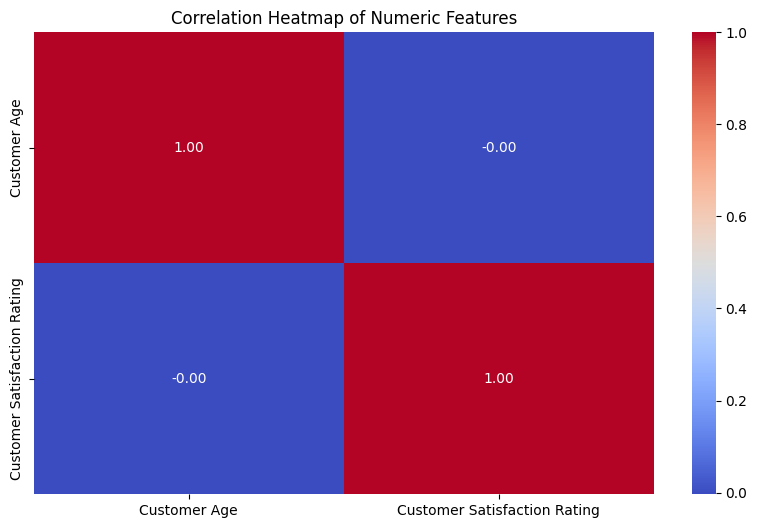

In [48]:
plt.figure(figsize=(10, 6))
df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [13]:
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [14]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [26]:
# Dataset shape and info
print("Shape of data:", df.shape)
df.info()

# Summary statistics
df.describe(include='all')


Shape of data: (2769, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Customer Age                  2769 non-null   int64         
 1   Customer Gender               2769 non-null   object        
 2   Product Purchased             2769 non-null   object        
 3   Date of Purchase              2769 non-null   datetime64[ns]
 4   Ticket Type                   2769 non-null   object        
 5   Ticket Status                 2769 non-null   object        
 6   Ticket Priority               2769 non-null   object        
 7   Ticket Channel                2769 non-null   object        
 8   First Response Time           2769 non-null   object        
 9   Time to Resolution            2769 non-null   object        
 10  Customer Satisfaction Rating  2769 non-null   float64       
dtypes: dateti

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,2769.000000,2769,2769,2769,2769,2769,2769,2769,2769,2769,2769.000000
unique,NaN,3,42,NaN,5,1,4,4,2723,2728,NaN
top,NaN,Female,Canon EOS,NaN,Refund request,Closed,Critical,Email,2023-06-01 01:21:19,2023-06-01 17:14:42,NaN
freq,NaN,984,83,NaN,596,2769,726,720,3,3,NaN
mean,44.333694,NaN,NaN,2020-12-28 16:55:38.678223104,NaN,NaN,NaN,NaN,NaN,NaN,2.991333
min,18.000000,NaN,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,31.000000,NaN,NaN,2020-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,45.000000,NaN,NaN,2020-12-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,57.000000,NaN,NaN,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
max,70.000000,NaN,NaN,2021-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [29]:
# Drop columns that are not useful for prediction (like Name, Email, Descriptions, etc.)
df = df.drop(['Ticket ID', 'Customer Name', 'Customer Email','Ticket Subject', 'Ticket Description', 'Resolution'], axis=0, errors='ignore')

# Convert Date to datetime
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])

# Remove rows with missing satisfaction rating (our target column)
df = df.dropna(subset=['Customer Satisfaction Rating'])

# Drop or fill other missing values
df = df.dropna()


In [30]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Check encoded data
df_encoded.head()


,Customer Age,Date of Purchase,Customer Satisfaction Rating,Customer Gender_Male,Customer Gender_Other,Product Purchased_Amazon Echo,Product Purchased_Amazon Kindle,Product Purchased_Apple AirPods,Product Purchased_Asus ROG,Product Purchased_Autodesk AutoCAD,...,Time to Resolution_2023-06-02 00:18:57,Time to Resolution_2023-06-02 00:19:35,Time to Resolution_2023-06-02 00:25:14,Time to Resolution_2023-06-02 00:27:03,Time to Resolution_2023-06-02 00:31:18,Time to Resolution_2023-06-02 00:32:35,Time to Resolution_2023-06-02 00:37:04,Time to Resolution_2023-06-02 00:46:40,Time to Resolution_2023-06-02 00:48:38,Time to Resolution_2023-06-02 00:55:33
2,48,2020-07-14,3.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,27,2020-11-13,3.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,67,2020-02-04,1.0,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
10,48,2021-01-19,1.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,51,2021-10-24,1.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# Define X and y
X = df_encoded.drop('Customer Satisfaction Rating', axis=1)
y = df_encoded['Customer Satisfaction Rating']


In [32]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.ensemble import RandomForestRegressor

# Remove datetime columns from X_train and X_test
X_train_rf = X_train.drop(columns=[col for col in X_train.columns if np.issubdtype(X_train[col].dtype, np.datetime64)])
X_test_rf = X_test.drop(columns=[col for col in X_test.columns if np.issubdtype(X_test[col].dtype, np.datetime64)])

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_rf, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
# Predict
y_pred = model.predict(X_test_rf)

# Metrics
mse = mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 2.181812454873646
R2 Score: -0.10609852213656712
